Task no. 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SLS22.csv")

# a. Normalize data
# run 1,2
for r in range(1, 2+1):
    run = "run " + str(r)
    df[run] = df[run]/np.max(df[run])
# trick 1-6
for t in range(1, 6+1):
    trick = "trick " + str(t)
    df[trick] = df[trick]/np.max(df[trick])

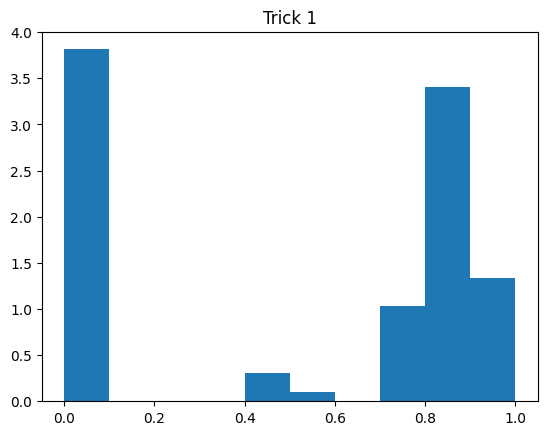

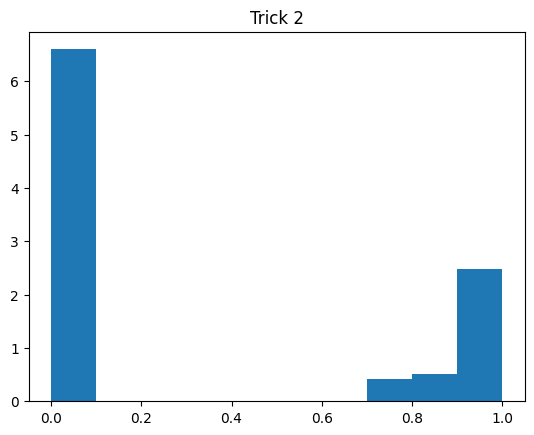

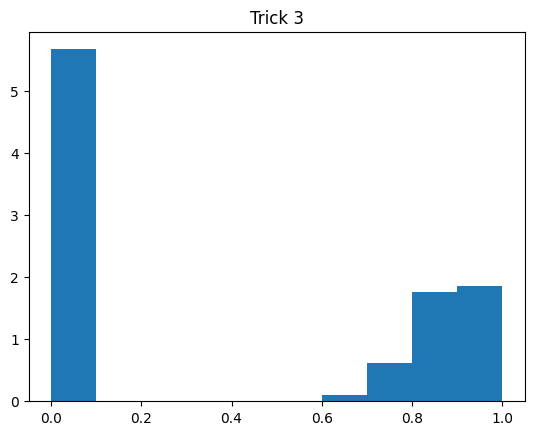

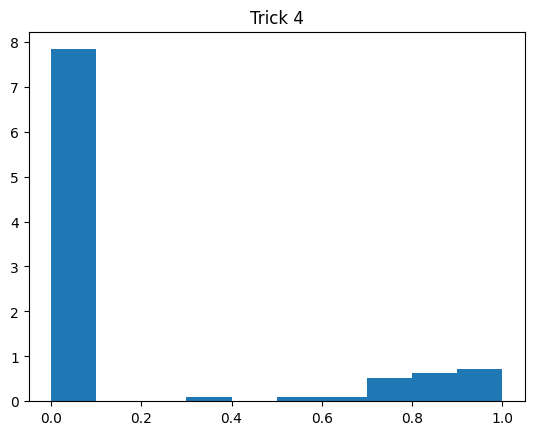

In [2]:
# b. Histograms for tricks 1-4
for t in range(1, 4+1):
    plt.title("Trick " + str(t))
    plt.hist(df["trick " + str(t)], density=True)
    plt.show()

In [3]:
print(df)

           id      location  month  year        comp  heat     run 1  \
0      Berger  jacksonville      7  2022  prelim men     1  0.543478   
1        Papa  jacksonville      7  2022  prelim men     1  0.402174   
2     Pudwill  jacksonville      7  2022  prelim men     1  0.217391   
3      Shirai  jacksonville      7  2022  prelim men     1  0.858696   
4        Mota  jacksonville      7  2022  prelim men     1  0.413043   
..        ...           ...    ...   ...         ...   ...       ...   
92      Hoban     las vegas     10  2022   final men     1  0.673913   
93    Hoefler     las vegas     10  2022   final men     1  0.913043   
94      Eaton     las vegas     10  2022   final men     1  0.750000   
95     Joslin     las vegas     10  2022   final men     1  0.739130   
96  Ribeiro G     las vegas     10  2022   final men     1  0.923913   

       run 2   trick 1   trick 2   trick 3   trick 4   trick 5   trick 6  
0   0.119565  0.729167  0.000000  0.800000  0.000000       N

In [4]:
# c. make i
def f(x):
    if x == 0:
        return 0
    else:
        return 1


for k in range(1, 4+1):
    make = df["trick " + str(k)].apply(f)
    make.name = "make " + str(k)  # Assign the name directly here
    df = pd.concat([df, make], axis=1)  # Use df[cols] to include all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# d. 
all_skaters = []
for row in range(len(df)):
    if df["id"][row] not in all_skaters:
        all_skaters.append(df["id"][row])
# print(all_skaters)
all_skaters.sort()

prob_list = []
miss_list = []
for skater in all_skaters:
    score = 0
    make_counter = 0
    miss_counter = 0
    total_counter = 0
    for row in range(len(df)):
        if df["id"][row] == skater:
            for trick_no in range(1, 6+1):
                # print(df["trick " + str(trick_no)][row])
                # print(df["trick " + str(trick_no)][row] == 0)
                if pd.notna(df["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    total_counter += 1
                    if df["trick " + str(trick_no)][row] == 0:
                        miss_counter += 1
                    if df["trick " + str(trick_no)][row] > 0:  # screw their "make i"s
                        make_counter += 1
                        if df["trick " + str(trick_no)][row] > .6:
                            score += 1
    try:
        prob_list.append(score/make_counter)
    except ZeroDivisionError:
        prob_list.append(0)
    try:
        miss_list.append(miss_counter/total_counter)
    except ZeroDivisionError:
        miss_list.append(0)

print(all_skaters)
print("average score list")
print(prob_list)
print("probability of miss list")
print(miss_list)

['Berger', 'Decenzo', 'Eaton', 'Foy', 'Fynn', 'Gustavo', 'Hoban', 'Hoefler', 'Horigome', 'Huston', 'Jordan', 'Joslin', 'Majerus', 'McClung', 'Midler', 'Milou', 'Mota', 'Oliveira', 'O’neill', 'Papa', 'Pudwill', 'Ribeiro C', 'Ribeiro G', 'Rodriguez', 'Santiago', 'Shirai', 'Silvas', 'Suciu', 'Wair', 'Wright']
average score list
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 0.9285714285714286, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
probability of miss list
[0.8333333333333334, 0.6111111111111112, 0.375, 0.5, 0.5, 0.6, 0.6363636363636364, 0.6111111111111112, 0.55, 0.625, 0.6, 0.5, 0.625, 0.75, 0.6666666666666666, 0.5416666666666666, 0.75, 0.5833333333333334, 0.75, 0.5625, 0.75, 0.75, 0.5, 0.5, 0.9166666666666666, 0.6363636363636364, 0.625, 0.375, 0.5, 0.75]


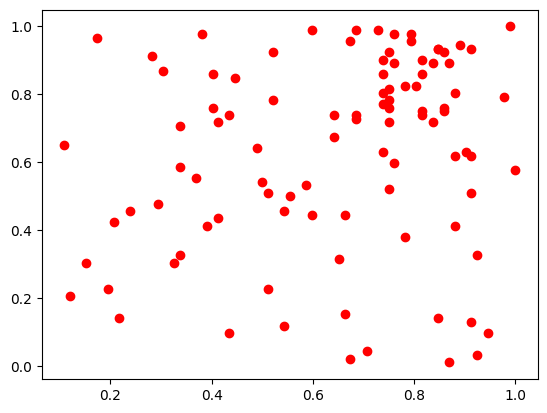

In [6]:
# e. run 1 & run 2 scatter
# spridningsdiagram (scatter diagrams?)
plt.plot(df["run 1"], df["run 2"], 'ro')
plt.show()


Task no. 1

In [7]:
# (a) point estimates for V
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning) #remember indexing

df_alt = df[df.id != "Horigome"]
df_alt = df_alt[df.id != "Joslin"]
df_alt = df_alt[df.id != "Milou"]
df_alt = df_alt[df.id != "Ribeiro G"]

skaters = ["Majerus", "Oliveira", "Decenzo", "Santiago",
           "Papa", "Eaton", "Mota", "Shirai",
           "Jordan", "Hoefler", "Hoban", "Gustavo",
           "Ribeiro C", "O’neill", "Foy", "Midler"]



C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [8]:
print(df_alt)

           id      location  month  year        comp  heat     run 1  \
0      Berger  jacksonville      7  2022  prelim men     1  0.543478   
1        Papa  jacksonville      7  2022  prelim men     1  0.402174   
2     Pudwill  jacksonville      7  2022  prelim men     1  0.217391   
3      Shirai  jacksonville      7  2022  prelim men     1  0.858696   
4        Mota  jacksonville      7  2022  prelim men     1  0.413043   
6     Decenzo  jacksonville      7  2022  prelim men     2  0.500000   
7     Hoefler  jacksonville      7  2022  prelim men     2  0.858696   
8         Foy  jacksonville      7  2022  prelim men     2  0.586957   
9       Hoban  jacksonville      7  2022  prelim men     2  0.380435   
10     Midler  jacksonville      7  2022  prelim men     3  0.880435   
12  Rodriguez  jacksonville      7  2022  prelim men     3  0.760870   
13    O’neill  jacksonville      7  2022  prelim men     3  0.945652   
14   Oliveira  jacksonville      7  2022  prelim men     3  0.91

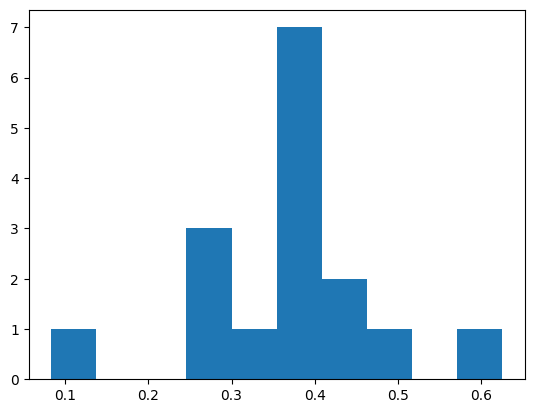

[0.375, 0.41666666666666663, 0.38888888888888884, 0.08333333333333337, 0.4375, 0.625, 0.25, 0.36363636363636365, 0.4, 0.38888888888888884, 0.36363636363636365, 0.4, 0.25, 0.25, 0.5, 0.33333333333333337]


In [9]:
theta_parameters = []
for skater in skaters:
    miss_counter = 0
    total_counter = 0
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                        total_counter += 1
                        if df_alt["trick " + str(trick_no)][row] == 0:
                            miss_counter += 1
        except KeyError:
            # print("hi")
            pass
    # print(skater)
    # print(total_counter)
    theta_parameters.append(1 - miss_counter / total_counter)
plt.hist(theta_parameters)
plt.show()
print(theta_parameters)

In [10]:
# (b) point estimates for X
alpha_parameters = []
beta_parameters = []
for skater in skaters:
    Z_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    if df_alt["trick " + str(trick_no)][row] > 0:
                        Z_outcomes.append(df_alt["trick " + str(trick_no)][row])
        except KeyError:
            # print("hi")
            pass
    print(skater)
    print(Z_outcomes)
    Z_mean = np.mean(Z_outcomes)
    print(Z_mean)
    Z_usv = np.var(Z_outcomes, ddof=True)   # unbiased sample variance
    print(Z_usv)
    # https://statproofbook.github.io/P/beta-mome.html
    alpha_parameters.append(Z_mean * (Z_mean * (1 - Z_mean) / Z_usv - 1))
    beta_parameters.append((1 - Z_mean) * (Z_mean * (1 - Z_mean) / Z_usv - 1))
# plt.title("my own test")
print("testing")
print(alpha_parameters)
print(beta_parameters)

# Convert lists to numpy arrays
alpha_parameters = np.array(alpha_parameters)
beta_parameters = np.array(beta_parameters)

# Replace NaN values with mean
alpha_parameters_X = np.nan_to_num(alpha_parameters, nan=np.nanmean(alpha_parameters))
beta_parameters_X = np.nan_to_num(beta_parameters, nan=np.nanmean(beta_parameters))

print(alpha_parameters_X)
print(beta_parameters_X)

Majerus
[0.8229166666666667, 0.37894736842105264, 0.4166666666666667]
0.5395102339181287
0.060595090957474104
Oliveira
[0.8421052631578947, 0.863157894736842, 0.8526315789473684, 0.7717391304347826, 0.8736842105263158]
0.8406636155606406
0.0016230618582073534
Decenzo
[0.8125, 0.8958333333333334, 0.8210526315789474, 0.90625, 0.9789473684210527, 0.9347826086956522, 0.7473684210526316]
0.8709620518688025
0.006463643218380125
Santiago
[0.48958333333333337]
0.48958333333333337
nan
Papa
[0.75, 0.8842105263157896, 0.863157894736842, 0.9270833333333334, 0.7604166666666666, 0.6842105263157895, 0.8421052631578947]
0.8158834586466165
0.007451901981745301
Eaton
[0.78125, 0.9130434782608696, 0.8105263157894737, 0.9130434782608696, 0.7894736842105263]
0.8414673913043478
0.004383275598722834
Mota
[0.8125, 0.9456521739130435, 0.7187500000000001]
0.8256340579710145
0.01300052674070572
Shirai
[0.78125, 0.9684210526315788, 1.0, 0.9782608695652175, 0.9789473684210527, 0.9789473684210527, 0.968750000000000

C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\core\fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
alpha_parameters = []
beta_parameters = []
for skater in skaters:
    Z_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    if df_alt["trick " + str(trick_no)][row] > 0:
                        Z_outcomes.append(df_alt["trick " + str(trick_no)][row])
        except KeyError:
            # print("hi")
            pass
    # print(skater)
    # print(Z_outcomes)
    Z_mean = np.mean(Z_outcomes)
    # print(Z_mean)
    Z_usv = np.var(Z_outcomes, ddof=True)   # unbiased sample variance
    # print(Z_usv)
    # https://statproofbook.github.io/P/beta-mome.html
    alpha_parameters.append(Z_mean * (Z_mean * (1 - Z_mean) / Z_usv - 1))
    beta_parameters.append((1 - Z_mean) * (Z_mean * (1 - Z_mean) / Z_usv - 1))
# plt.title("my own test")
print("testing")
print(alpha_parameters)
print(beta_parameters)

# Convert lists to numpy arrays
alpha_parameters = np.array(alpha_parameters)
beta_parameters = np.array(beta_parameters)

# Replace NaN values with mean
alpha_parameters_X = np.nan_to_num(alpha_parameters, nan=np.nanmean(alpha_parameters))
beta_parameters_X = np.nan_to_num(beta_parameters, nan=np.nanmean(beta_parameters))

print(alpha_parameters_X)
print(beta_parameters_X)

testing
[1.6724734314194132, 68.53775377212024, 14.27296603174554, nan, 15.630936215674899, 24.76763814399931, 8.317096283255015, 8.46272694727672, 13.394333297658735, 27.117856365828086, 26.38810741671482, 56.98665428817877, 110.67152031063318, 385.24332979359167, 19.6564649834596, 33.26030400219357]
[1.427511195884641, 12.99040148937784, 2.1146205469353307, nan, 3.527359065373475, 4.666227505395984, 1.7564904383177071, 0.45789641364936695, 1.3762382902192216, 6.109517216855211, 1.9710354652113937, 10.676570420521331, 26.12417861409796, 51.74910400212416, 2.1421942300626418, 5.681685677178277]
[  1.67247343  68.53775377  14.27296603  54.29201075  15.63093622
  24.76763814   8.31709628   8.46272695  13.3943333   27.11785637
  26.38810742  56.98665429 110.67152031 385.24332979  19.65646498
  33.260304  ]
[ 1.4275112  12.99040149  2.11462055  8.85140204  3.52735907  4.66622751
  1.75649044  0.45789641  1.37623829  6.10951722  1.97103547 10.67657042
 26.12417861 51.749104    2.14219423  5

In [12]:
# (c) Point estimates for Y for which I chose the Beta distribution
# Run model
alpha_parameters = []
beta_parameters = []
for skater in skaters:
    Z_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for run_no in range(1, 2+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    Z_outcomes.append(df_alt["run " + str(run_no)][row])
        except KeyError:
            # print("hi")
            pass
    # print(skater)
    # print(Z_outcomes)
    Z_mean = np.mean(Z_outcomes)
    # print(Z_mean)
    Z_usv = np.var(Z_outcomes, ddof=True)   # unbiased sample variance
    # print(Z_usv)
    # https://statproofbook.github.io/P/beta-mome.html
    alpha_parameters.append(Z_mean * (Z_mean * (1 - Z_mean) / Z_usv - 1))
    beta_parameters.append((1 - Z_mean) * (Z_mean * (1 - Z_mean) / Z_usv - 1))
# plt.title("my own test")
print("testing")
print(alpha_parameters)
print(beta_parameters)

# Convert lists to numpy arrays
alpha_parameters_Y = np.array(alpha_parameters)
beta_parameters_Y = np.array(beta_parameters)

print(alpha_parameters_Y)
print(beta_parameters_Y)

# plt.plot(alpha_parameters_Y, beta_parameters_Y, 'ro')
# plt.show()

testing
[1.076159391023389, 3.7700265849073964, 2.9858013485477173, 2.0000397196890587, 1.571804361561061, 58.31861413043472, 2.9700876848946653, 1.218291764710187, 2.1070919225576947, 1.06675847887896, 2.572100810457778, 0.7913610428820687, 1.1584430211926586, 0.32314254697400047, 2.5584806359509584, 0.7031831118511126]
[1.3095433553417142, 2.2971882106287045, 1.6308998962655592, 2.821016722530854, 1.2566748807590875, 14.431385869565196, 2.8437009748991486, 0.5750337129432079, 0.49146648059656656, 0.45481950649878106, 1.1602852236449912, 0.4447207218912813, 0.8091278948022567, 0.3375044379506228, 2.540007851575861, 0.3544656013418414]
[ 1.07615939  3.77002658  2.98580135  2.00003972  1.57180436 58.31861413
  2.97008768  1.21829176  2.10709192  1.06675848  2.57210081  0.79136104
  1.15844302  0.32314255  2.55848064  0.70318311]
[ 1.30954336  2.29718821  1.6308999   2.82101672  1.25667488 14.43138587
  2.84370097  0.57503371  0.49146648  0.45481951  1.16028522  0.44472072
  0.80912789  

In [13]:
from scipy import stats

# (d) lastly: simulate 5000 cups
# for loop
all_winners = []

for cup in range(5000):
    # 2 runs for each skater
    # 4 tricks for eachs skater
    # calculate scores
    # Set W = [W1, W2, W3, W4], W for Winners
    grades_list = []
    for skater_no in range(len(skaters)):
        run_list = stats.beta.rvs(a=alpha_parameters_Y[skater_no], b=beta_parameters_Y[skater_no], size=2)
        # print(run_list)
        r1 = run_list[0] 
        r2 = run_list[1]
        trick_list = stats.beta.rvs(a=alpha_parameters_Y[skater_no], b=beta_parameters_Y[skater_no], size=4)
        make_list = stats.bernoulli.rvs(p=theta_parameters[skater_no], size=4)
        # remove the tricks they didn't make
        made_trick_list = []
        for t in range(4):
            if make_list[t]:
                made_trick_list.append(trick_list[t])
            else:
                made_trick_list.append(0) # I could just leave it blanc, but this is easier when calculating grades later
        # print(made_trick_list)

        # calculate grades
        # sort, and pop from trick list
        made_trick_list.sort()
        top_trick = made_trick_list.pop()
        next_top_trick = made_trick_list.pop()    

        grade = max(run_list) + top_trick + next_top_trick
        grades_list.append(grade)

    # print(grades_list)

    # Extract indices of top four grades
    top_four_indices = np.argsort(grades_list)[::-1][:4]

    # The top four grades (whoo)
    top_four_grades = [grades_list[i] for i in top_four_indices]

    #print("Top four grades:", top_four_grades)
    #print("Indices of top four grades:", top_four_indices)
    #print("corresponding skaters are:")
    # cup_winnders = []
    for k in range(4):
        all_winners.append(skaters[top_four_indices[k]])
        # print(skaters[top_four_indices[k]])
    # for refference: skaters = ["Majerus", "Oliveira", "Decenzo", "Santiago",
                     # "Papa", "Eaton", "Mota", "Shirai",
                     # "Jordan", "Hoefler", "Hoban", "Gustavo",
                     # "Ribeiro C", "O’neill", "Foy", "Midler"]


from collections import Counter
                
# Find average winners (doesn't really matter if they're 1st or 4th)
skater_counts = Counter(all_winners)
print(skater_counts)

# Get the top four skaters and their counts
top_four_skaters = skater_counts.most_common(4)
print(top_four_skaters)

# Print the top four skaters
print("Top four skaters:")
for skater, count in top_four_skaters:
    print(f"{skater}: {count} wins")

Counter({'Eaton': 4048, 'Jordan': 2662, 'Hoefler': 1865, 'Gustavo': 1701, 'Shirai': 1622, 'Hoban': 1485, 'Midler': 1385, 'Decenzo': 1293, 'Oliveira': 1079, 'Papa': 950, 'Ribeiro C': 522, 'Foy': 483, 'O’neill': 442, 'Majerus': 319, 'Mota': 139, 'Santiago': 5})
[('Eaton', 4048), ('Jordan', 2662), ('Hoefler', 1865), ('Gustavo', 1701)]
Top four skaters:
Eaton: 4048 wins
Jordan: 2662 wins
Hoefler: 1865 wins
Gustavo: 1701 wins


Task no.3